In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
from pycaret import *

In [5]:
from pycaret.regression import *
r2= setup(df,target='charges',session_id=123,)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [6]:
lr1=create_model('lr') # evaluation matrix

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


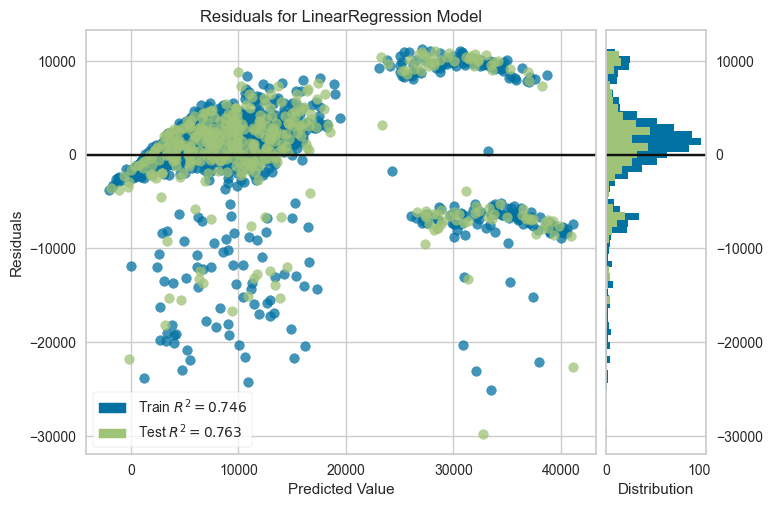

In [7]:
plot_model(lr1,plot="residuals")

In [8]:
r2= setup(df,target="charges",session_id=123,normalize=True,polynomial_features=True,bin_numeric_features=['age','bmi'])

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [9]:
lr2=create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3039.5847,21720431.4992,4660.5184,0.8703,0.3966,0.3151
1,3379.8362,32751580.5158,5722.8997,0.8096,0.4432,0.3076
2,3077.3214,23089153.6690,4805.1174,0.7077,0.5047,0.3831
3,2939.4254,20596763.2995,4538.3657,0.8280,0.4446,0.3809
4,3161.2812,28205595.5299,5310.8940,0.7902,0.5012,0.2972
5,3108.4472,24106072.5978,4909.7935,0.8449,0.4032,0.2975
6,2754.4362,21720478.9415,4660.5235,0.8522,0.3684,0.2914
7,3409.9708,29714388.8298,5451.0906,0.8366,0.4531,0.2934
8,3282.6467,25176958.7438,5017.6647,0.8374,0.4151,0.3560


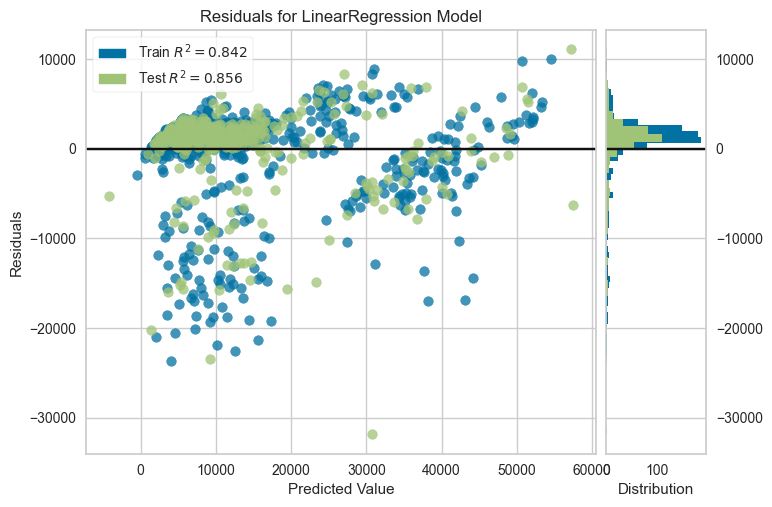

In [10]:
plot_model(lr2,plot='residuals')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.regression import *
mpl.rcParams['figure.dpi'] = 300

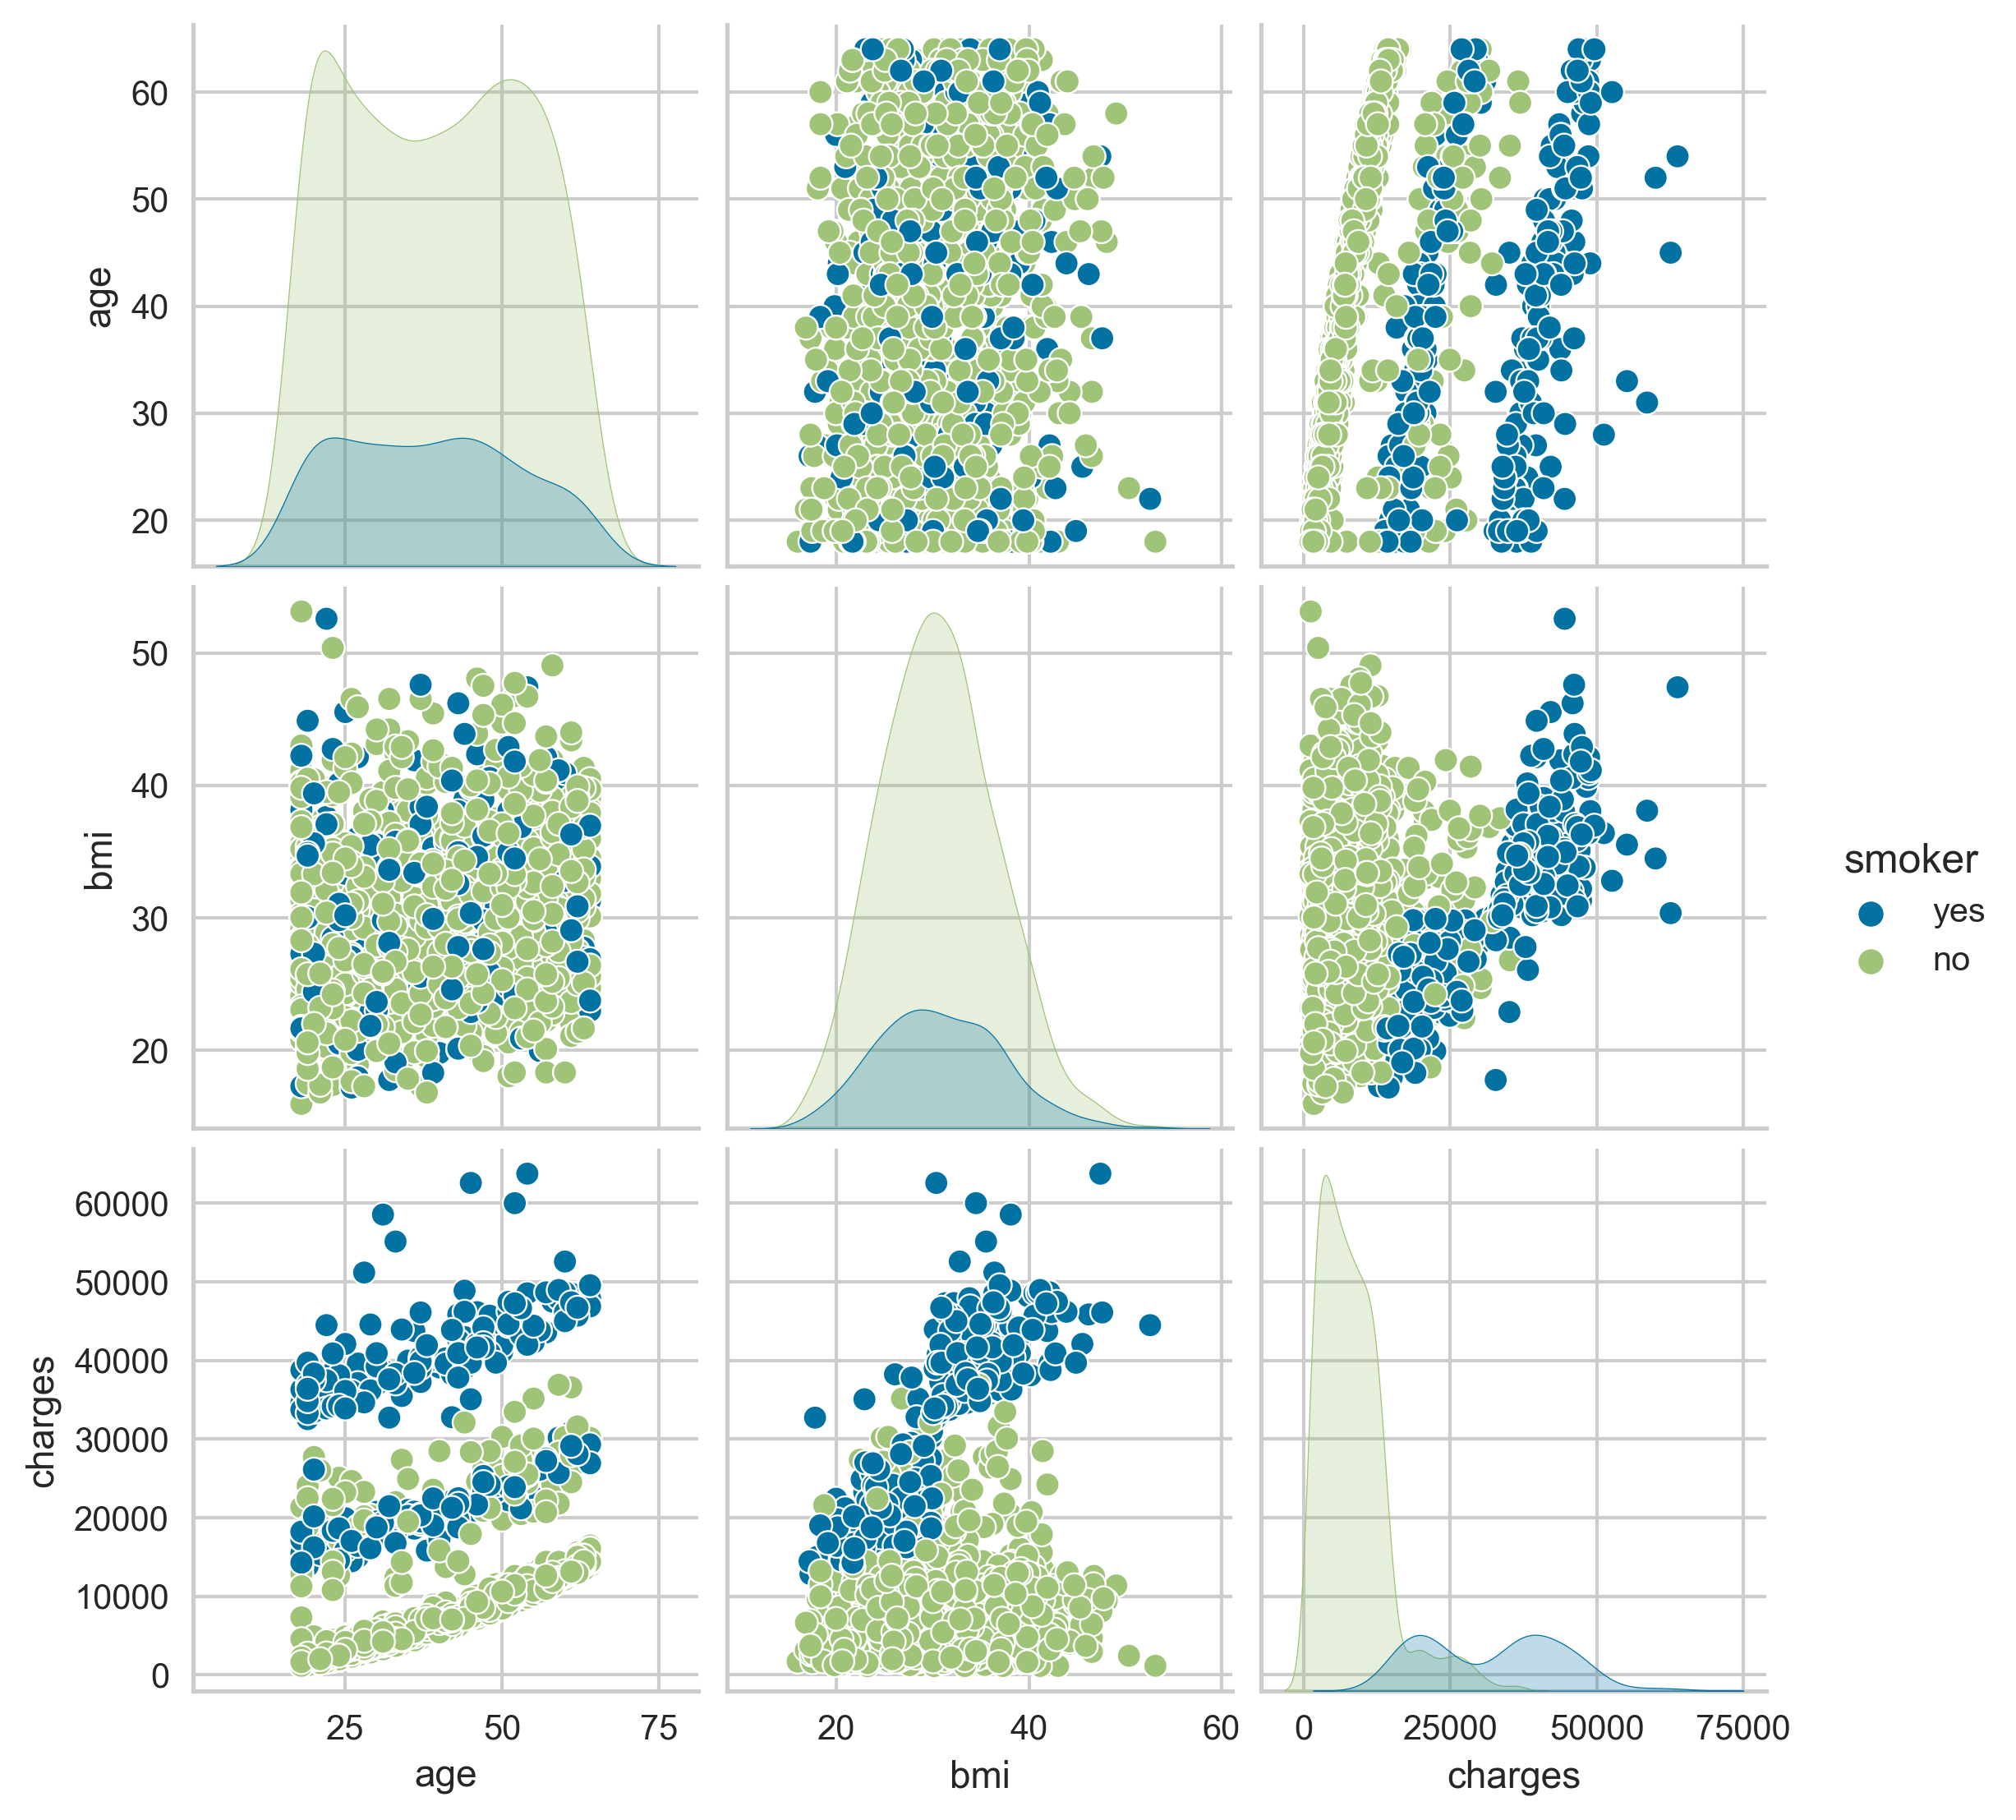

In [4]:
numeric = ['age', 'bmi', 'charges', 'smoker']

sns.pairplot(df[numeric], hue='smoker')
plt.show()

In [5]:

reg = setup(
    data = df,
    target= 'charges',
    train_size = 0.8,
    session_id = 7402,
    normalize = True
)

,Description,Value
0,Session id,7402
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [6]:
from pycaret.regression import *
r2 = setup(df, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True,
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [7]:
best = compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2771.3562,24771465.5968,4963.9690,0.8220,0.4447,0.3276,0.2000
ridge,Ridge Regression,3122.4834,25460981.8579,5032.6243,0.8198,0.4402,0.3214,0.0690
br,Bayesian Ridge,3123.0010,25476931.8579,5034.4660,0.8195,0.4416,0.3192,0.0790
lasso,Lasso Regression,3130.2770,25506226.7505,5036.6840,0.8197,0.4419,0.3247,0.0840
lr,Linear Regression,3145.1389,25570055.3745,5042.6553,0.8193,0.4443,0.3281,1.1390
llar,Lasso Least Angle Regression,3113.5762,25673223.4724,5051.3157,0.8182,0.4335,0.3230,0.0750
rf,Random Forest Regressor,2780.4582,25774646.0837,5060.4559,0.8152,0.4748,0.3334,0.3910
lightgbm,Light Gradient Boosting Machine,3039.8891,25942822.3275,5080.1797,0.8124,0.5494,0.3688,0.2610
huber,Huber Regressor,2132.3347,27278987.3796,5199.7491,0.8087,0.3984,0.0873,0.0870
par,Passive Aggressive Regressor,2159.3747,27448412.8814,5218.4142,0.8073,0.3986,0.0892,0.1210


In [8]:
model = create_model('gbr', fold= 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2733.9477,22302506.7790,4722.5530,0.8668,0.4213,0.3258
1,2882.3359,28697593.0269,5357.0134,0.8331,0.4420,0.2903
2,2859.2093,25539693.1335,5053.6811,0.6766,0.4998,0.4066
3,2823.3222,22331196.7260,4725.5896,0.8135,0.4747,0.3869
4,3040.3231,29486333.4786,5430.1320,0.7807,0.5243,0.3599
5,2686.8152,20408127.4184,4517.5355,0.8687,0.3561,0.2643
6,2306.2689,18355298.1269,4284.3084,0.8751,0.3468,0.2687
7,2834.1422,26814514.5204,5178.2733,0.8526,0.4358,0.2801
8,2741.9167,26387945.5986,5136.9199,0.8296,0.4395,0.3512


In [9]:
params = {
    'learning_rate': [0.01, 0.02, 0.05],
    'max_depth': [1,2,3,4,5,6,7,8],
    'subsample': [0.4, 0.5, 0.6, 0.7, 0.8],
    'n_estimators': [100,200.300,400,500,600]
}

In [10]:
tuned_model = tune_model(
    model,
    optimize='RMSE',
    fold=10,
    custom_grid=params,
    n_iter= 30
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2518.5539,18888958.8974,4346.1430,0.8872,0.4211,0.3364
1,3068.3953,29846033.6115,5463.1524,0.8265,0.4655,0.3393
2,2681.4841,20746972.9148,4554.8845,0.7373,0.4942,0.4137
3,2651.7582,18340863.1531,4282.6234,0.8469,0.4665,0.4304
4,2839.4743,25485800.0522,5048.3463,0.8104,0.4738,0.3307
5,2594.6885,18909936.6771,4348.5557,0.8784,0.3893,0.3060
6,2362.6685,18683842.0111,4322.4810,0.8729,0.3902,0.3181
7,2892.8928,26834524.8039,5180.2051,0.8524,0.4796,0.3357
8,2543.0865,20641421.5442,4543.2831,0.8667,0.4619,0.3918


Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [11]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2526.8550,19185277.7430,4380.1002,0.8657,0.4158,0.3193


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10249.292916
319,32,male,37.334999,1,no,northeast,4667.607422,9492.938328
314,27,female,31.400000,0,yes,southwest,34838.871094,34600.510542
150,35,male,24.129999,1,no,northwest,5125.215820,6764.088738
336,60,male,25.740000,0,no,southeast,12142.578125,15116.599901
...,...,...,...,...,...,...,...,...
1221,40,male,24.969999,2,no,southeast,6593.508301,8349.600132
973,19,female,40.500000,0,no,southwest,1759.338013,3318.100535
1250,24,male,29.830000,0,yes,northeast,18648.421875,19100.009922
887,36,female,30.020000,0,no,northwest,5272.175781,5526.635637


In [12]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
final_model = finalize_model(model)
save_model(final_model, 'insurance_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
               